In [113]:
 #! Airline customer tweets - Sentiment Analysis class project Seneca

In [4]:
#Load Libraries
import numpy as np
import pandas as pd
%matplotlib inline
import seaborn as sns
import os
from textblob import TextBlob
import nltk 
from sklearn.preprocessing import MinMaxScaler
from matplotlib import pyplot as plt

import os
import re
import nltk
from nltk.corpus import stopwords
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))


import os
print(os.listdir("../input"))
import re
import nltk
from nltk.corpus import stopwords
from sklearn.model_selection import train_test_split
from mlxtend.plotting import plot_confusion_matrix
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

In [5]:
#Load Dataset
data = pd.read_csv("../ban200project/airlineTweets.csv")
data.head()

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone
0,570306133677760513,neutral,1.0000,NaN,NaN,Virgin America,NaN,cairdin,NaN,0,@VirginAmerica What @dhepburn said.,NaN,2015-02-24 11:35:52 -0800,NaN,Eastern Time (US & Canada)
1,570301130888122368,positive,0.3486,NaN,0.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica plus you've added commercials t...,NaN,2015-02-24 11:15:59 -0800,NaN,Pacific Time (US & Canada)
2,570301083672813571,neutral,0.6837,NaN,NaN,Virgin America,NaN,yvonnalynn,NaN,0,@VirginAmerica I didn't today... Must mean I n...,NaN,2015-02-24 11:15:48 -0800,Lets Play,Central Time (US & Canada)
3,570301031407624196,negative,1.0000,Bad Flight,0.7033,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica it's really aggressive to blast...,NaN,2015-02-24 11:15:36 -0800,NaN,Pacific Time (US & Canada)
4,570300817074462722,negative,1.0000,Can't Tell,1.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica and it's a really big bad thing...,NaN,2015-02-24 11:14:45 -0800,NaN,Pacific Time (US & Canada)


#Load Dataset 2
data2 = pd.read_csv("../ban200project/airlineTweets.csv")
data2.head()

In [6]:
data.shape

(14640, 15)

In [7]:
data.describe()

,tweet_id,airline_sentiment_confidence,negativereason_confidence,retweet_count
count,1.464000e+04,14640.000000,10522.000000,14640.000000
mean,5.692184e+17,0.900169,0.638298,0.082650
std,7.791112e+14,0.162830,0.330440,0.745778
min,5.675883e+17,0.335000,0.000000,0.000000
25%,5.685592e+17,0.692300,0.360600,0.000000
50%,5.694779e+17,1.000000,0.670600,0.000000
75%,5.698905e+17,1.000000,1.000000,0.000000
max,5.703106e+17,1.000000,1.000000,44.000000


In [7]:
data.isnull().sum()

tweet_id                            0
airline_sentiment                   0
airline_sentiment_confidence        0
negativereason                   5462
negativereason_confidence        4118
airline                             0
airline_sentiment_gold          14600
name                                0
negativereason_gold             14608
retweet_count                       0
text                                0
tweet_coord                     13621
tweet_created                       0
tweet_location                   4733
user_timezone                    4820
dtype: int64

In [12]:
# Displaying third row on second column - tokenizing
data["airline_sentiment"][3]

'negative'

In [14]:
# Word count in airline column
data['word_count']=data['airline'].apply(lambda x: len(str(x).split(" ")))
data[['airline','word_count']].head(20788)

,airline,word_count
0,Virgin America,2
1,Virgin America,2
2,Virgin America,2
3,Virgin America,2
4,Virgin America,2
...,...,...
14635,American,1
14636,American,1
14637,American,1
14638,American,1


In [15]:
# Displaying third row on text column - tokenizing
data["text"][3]

'@VirginAmerica it\'s really aggressive to blast obnoxious "entertainment" in your guests\' faces &amp; they have little recourse'

In [56]:
# Number of characters 
data['char_count']=data['text'].str.len()
data[['text','char_count']].head(10)

,text,char_count
0,Virginamerica What Dhepburn Said,32
1,Virginamerica Plus Added Commercials Experienc...,53
2,Virginamerica I Today Must Mean I Need Take An...,56
3,Virginamerica Really Aggressive Blast Obnoxiou...,94
4,Virginamerica Really Big Bad Thing,34
5,Virginamerica Seriously Would Pay 30 Flight Se...,84
6,Virginamerica Yes Nearly Every Time I Fly Vx E...,67
7,Virginamerica Really Missed Prime Opportunity ...,94
8,Virginamerica Well I DidnTBut Now I Do D,40
9,Virginamerica Amazing Arrived Hour Early YouRe...,54


In [57]:
# Stopwords
import nltk 
nltk.download('stopwords')

from nltk.corpus import stopwords
stop=stopwords.words('english')

data['stopwords']=data['text'].apply(lambda x: len([x for x in x.split() if x in stop]))
data[['text','stopwords']].head()

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Durmus\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


,text,stopwords
0,Virginamerica What Dhepburn Said,0
1,Virginamerica Plus Added Commercials Experienc...,0
2,Virginamerica I Today Must Mean I Need Take An...,0
3,Virginamerica Really Aggressive Blast Obnoxiou...,0
4,Virginamerica Really Big Bad Thing,0


In [58]:
# Removing stop words

from nltk.corpus import stopwords
stop=stopwords.words('english')

data['text']=data['text'].apply(lambda x: " ".join(x for x in x.split() if x not in stop))
data['text'].head()

0                     Virginamerica What Dhepburn Said
1    Virginamerica Plus Added Commercials Experienc...
2    Virginamerica I Today Must Mean I Need Take An...
3    Virginamerica Really Aggressive Blast Obnoxiou...
4                   Virginamerica Really Big Bad Thing
Name: text, dtype: object

In [59]:
# Stopwords check
import nltk 
nltk.download('stopwords')

from nltk.corpus import stopwords
stop=stopwords.words('english')

data['stopwords']=data['text'].apply(lambda x: len([x for x in x.split() if x in stop]))
data[['text','stopwords']].head()


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Durmus\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


,text,stopwords
0,Virginamerica What Dhepburn Said,0
1,Virginamerica Plus Added Commercials Experienc...,0
2,Virginamerica I Today Must Mean I Need Take An...,0
3,Virginamerica Really Aggressive Blast Obnoxiou...,0
4,Virginamerica Really Big Bad Thing,0


In [60]:
data['text']=data['text'].apply(lambda x: " ".join(x.title() for x in x.split()))
data['text'].head()

0                     Virginamerica What Dhepburn Said
1    Virginamerica Plus Added Commercials Experienc...
2    Virginamerica I Today Must Mean I Need Take An...
3    Virginamerica Really Aggressive Blast Obnoxiou...
4                   Virginamerica Really Big Bad Thing
Name: text, dtype: object

In [61]:
# Removing special characters
data['text']=data['text'].str.replace('[^\w\s]','')
data['text'].head()

<ipython-input-61-639f12ea7796>:2: FutureWarning: The default value of regex will change from True to False in a future version.
  data['text']=data['text'].str.replace('[^\w\s]','')


0                     Virginamerica What Dhepburn Said
1    Virginamerica Plus Added Commercials Experienc...
2    Virginamerica I Today Must Mean I Need Take An...
3    Virginamerica Really Aggressive Blast Obnoxiou...
4                   Virginamerica Really Big Bad Thing
Name: text, dtype: object

In [62]:
# Displaying third row on text column - tokenizing
data["text"][3]

'Virginamerica Really Aggressive Blast Obnoxious Entertainment Guests Faces Amp Little Recourse'

In [63]:
# Checking for special characters '@'
data['specialchr']=data['text'].apply(lambda x: len([x for x in x.split() if x.startswith('@')]))
data[['text','specialchr']].head()

,text,specialchr
0,Virginamerica What Dhepburn Said,0
1,Virginamerica Plus Added Commercials Experienc...,0
2,Virginamerica I Today Must Mean I Need Take An...,0
3,Virginamerica Really Aggressive Blast Obnoxiou...,0
4,Virginamerica Really Big Bad Thing,0


In [64]:
# Top 50 most frequently occuring words on text column, in tweets
freq=pd.Series(' '.join(data['text']).split()).value_counts()[:50]
freq

I                5076
United           4143
Flight           3873
Usairways        3051
Americanair      2957
Southwestair     2452
Jetblue          2361
Get              1334
Thanks           1072
Cancelled        1056
Service           956
You               877
Help              855
Time              770
Im                764
Customer          746
Us                679
Hours             669
Flights           646
2                 644
Amp               638
Hold              637
Plane             618
Thank             602
Cant              578
Still             568
Please            560
One               558
Need              553
Would             548
Delayed           529
Virginamerica     521
Back              518
Gate              514
Flightled         502
Call              500
Bag               483
It                466
Hour              464
Got               463
No                434
Like              426
Late              425
Phone             420
Today             406
Now       

In [65]:
# Spelling corrections
from textblob import TextBlob
data['text'][:10].apply(lambda x: str(TextBlob(x).correct()))

0                      Virginamerica That Hepburn Said
1    Virginamerica Plus Added Commercial Experience...
2    Virginamerica I Today Must Mean I Need Take An...
3    Virginamerica Really Aggressive Last Obnoxious...
4                   Virginamerica Really Fig Had Thing
5    Virginamerica Seriously Would May 30 Light Sea...
6    Virginamerica Yes Early Very Time I Fly X War ...
7    Virginamerica Really Kissed Crime Opportunity ...
8             Virginamerica Well I Didntbut Now I To D
9    Virginamerica Amazing Arrived Your Early More ...
Name: text, dtype: object

In [66]:
# Displaying first row on airline column - tokenizing
data["airline"][0]

'Virgin America'

(array([3099.,    0.,    0.,    0.,    0., 2363.,    0.,    0.,    0.,
        9178.]),
 array([0. , 0.2, 0.4, 0.6, 0.8, 1. , 1.2, 1.4, 1.6, 1.8, 2. ]),
 <BarContainer object of 10 artists>)

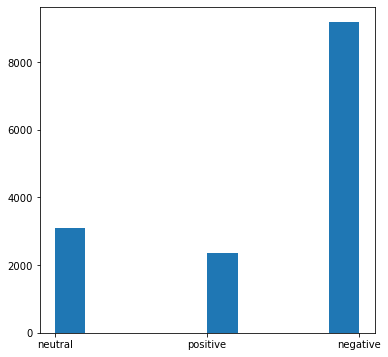

In [67]:
# Histogram
plt.hist(data['airline_sentiment'])

<AxesSubplot:>

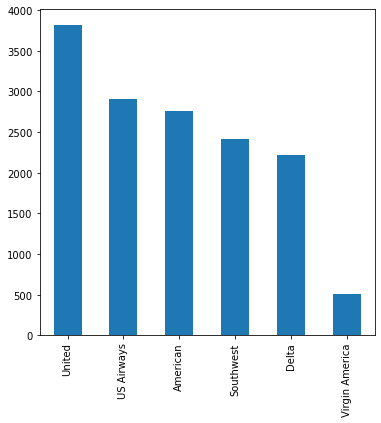

In [68]:
# Histogram
data['airline'].value_counts().plot(kind='bar')

In [69]:
data1 = data[['text','airline']]

In [70]:
df=data[['text']]
df

,text
0,Virginamerica What Dhepburn Said
1,Virginamerica Plus Added Commercials Experienc...
2,Virginamerica I Today Must Mean I Need Take An...
3,Virginamerica Really Aggressive Blast Obnoxiou...
4,Virginamerica Really Big Bad Thing
...,...
14635,Americanair Thank Got Different Flight Chicago
14636,Americanair Leaving 20 Minutes Late Flight No ...
14637,Americanair Please Bring American Airlines Bla...
14638,Americanair Money Change Flight Answer Phones ...


In [71]:
import matplotlib.pyplot as plt
%matplotlib inline

In [72]:
#Load Dataset 2
data2 = pd.read_csv("../ban200project/airlineTweets.csv")
data2.head()

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone
0,570306133677760513,neutral,1.0000,NaN,NaN,Virgin America,NaN,cairdin,NaN,0,@VirginAmerica What @dhepburn said.,NaN,2015-02-24 11:35:52 -0800,NaN,Eastern Time (US & Canada)
1,570301130888122368,positive,0.3486,NaN,0.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica plus you've added commercials t...,NaN,2015-02-24 11:15:59 -0800,NaN,Pacific Time (US & Canada)
2,570301083672813571,neutral,0.6837,NaN,NaN,Virgin America,NaN,yvonnalynn,NaN,0,@VirginAmerica I didn't today... Must mean I n...,NaN,2015-02-24 11:15:48 -0800,Lets Play,Central Time (US & Canada)
3,570301031407624196,negative,1.0000,Bad Flight,0.7033,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica it's really aggressive to blast...,NaN,2015-02-24 11:15:36 -0800,NaN,Pacific Time (US & Canada)
4,570300817074462722,negative,1.0000,Can't Tell,1.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica and it's a really big bad thing...,NaN,2015-02-24 11:14:45 -0800,NaN,Pacific Time (US & Canada)


import matplotlib.pyplot as plt
%matplotlib inline


Total number of tweets for each airline 
  airline
United            3822
US Airways        2913
American          2759
Southwest         2420
Delta             2222
Virgin America     504
Name: airline_sentiment, dtype: int64


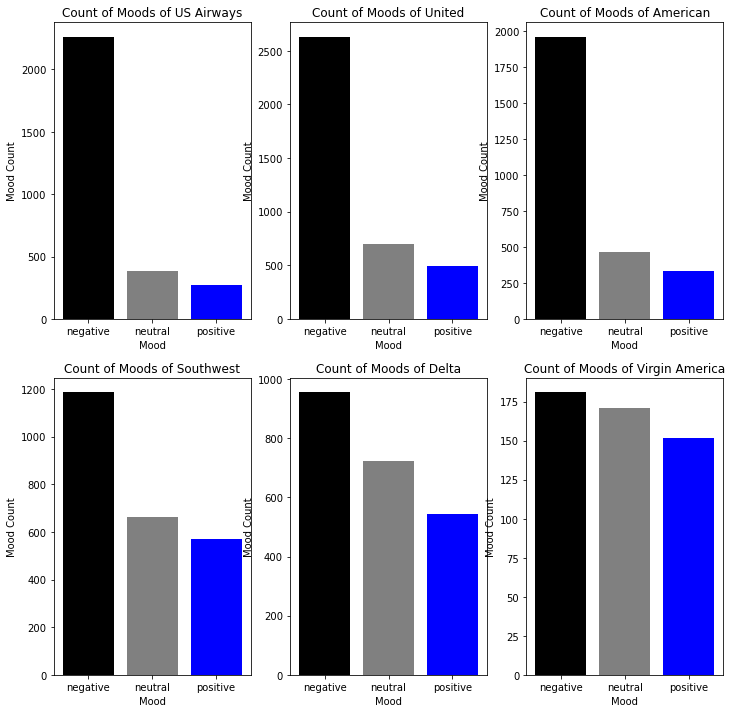

In [73]:
#import matplotlib.pyplot as plt %matplotlib inline
# Expression Counts
    
print("Total number of tweets for each airline \n ",data2.groupby('airline')['airline_sentiment'].count().sort_values(ascending=False))
airlines= ['US Airways','United','American','Southwest','Delta','Virgin America']
plt.figure(1,figsize=(12, 12))
for i in airlines:
    indices= airlines.index(i)
    plt.subplot(2,3,indices+1)
    new_df=data2[data2['airline']==i]
    count=new_df['airline_sentiment'].value_counts()
    Index = [1,2,3]
    plt.bar(Index,count, color=['black', 'grey', 'blue'])
    plt.xticks(Index,['negative','neutral','positive'])
    plt.ylabel('Mood Count')
    plt.xlabel('Mood')
    plt.title('Count of Moods of '+i)
    
    

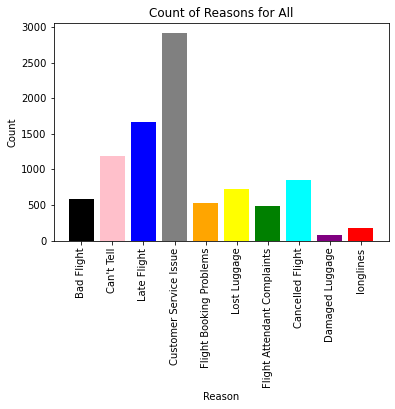

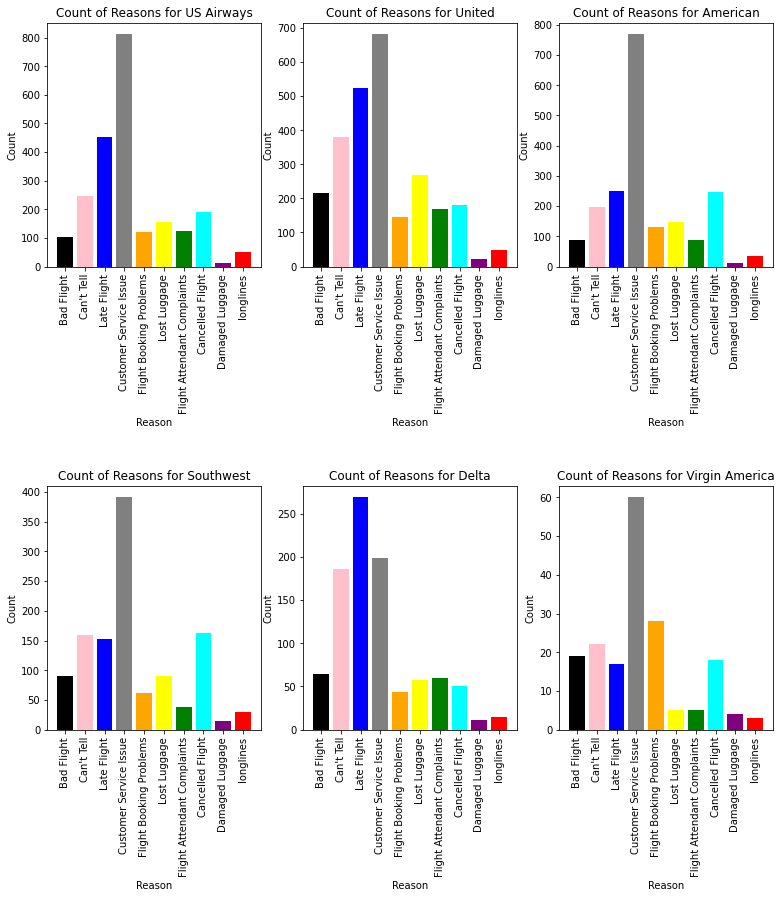

In [74]:
# Negative reasons
data2['negativereason'].nunique()

NR_Count=dict(data2['negativereason'].value_counts(sort=False))
def NR_Count(Airline):
    if Airline=='All':
        a=data2
    else:
        a=data2[data2['airline']==Airline]
    count=dict(a['negativereason'].value_counts())
    Unique_reason=list(data2['negativereason'].unique())
    Unique_reason=[x for x in Unique_reason if str(x) != 'nan']
    Reason_frame=pd.DataFrame({'Reasons':Unique_reason})
    Reason_frame['count']=Reason_frame['Reasons'].apply(lambda x: count[x])
    return Reason_frame
def plot_reason(Airline):
    
    a=NR_Count(Airline)
    count=a['count']
    Index = range(1,(len(a)+1))
    plt.bar(Index,count, color=['black','pink','blue','grey','orange','yellow','green','cyan','purple','red'])
    plt.xticks(Index,a['Reasons'],rotation=90)
    plt.ylabel('Count')
    plt.xlabel('Reason')
    plt.title('Count of Reasons for '+Airline)
    
plot_reason('All')
plt.figure(2,figsize=(13, 13))
for i in airlines:
    indices= airlines.index(i)
    plt.subplot(2,3,indices+1)
    plt.subplots_adjust(hspace=0.9)
    plot_reason(i)

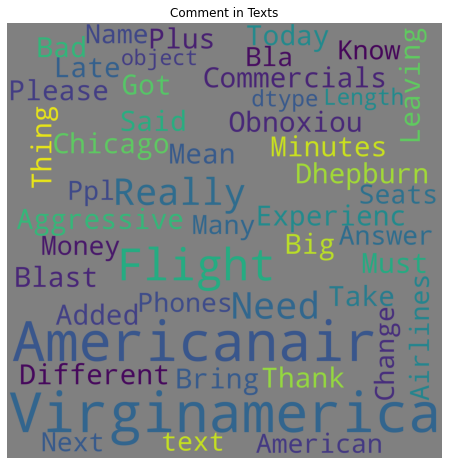

In [75]:
# Text Column Wordclloud
from wordcloud import WordCloud
from wordcloud import STOPWORDS
stopwords = set(STOPWORDS)
wordcloud = WordCloud(background_color = 'grey',
                      height =2000,
                      width = 2000
                     ).generate(str(data["text"]))
plt.rcParams['figure.figsize'] = (8,8)
plt.axis("off")
plt.imshow(wordcloud)
plt.title("Comment in Texts")
plt.show()

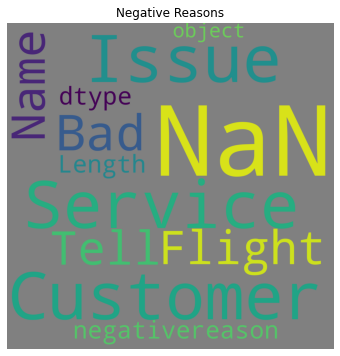

In [76]:
# Text Negative Column Wordclloud 
from wordcloud import WordCloud
from wordcloud import STOPWORDS
stopwords = set(STOPWORDS)
wordcloud = WordCloud(background_color = 'grey',
                      height =2000,
                      width = 2000
                     ).generate(str(data["negativereason"]))
plt.rcParams['figure.figsize'] = (6,6)
plt.axis("off")
plt.imshow(wordcloud)
plt.title("Negative Reasons")
plt.show()


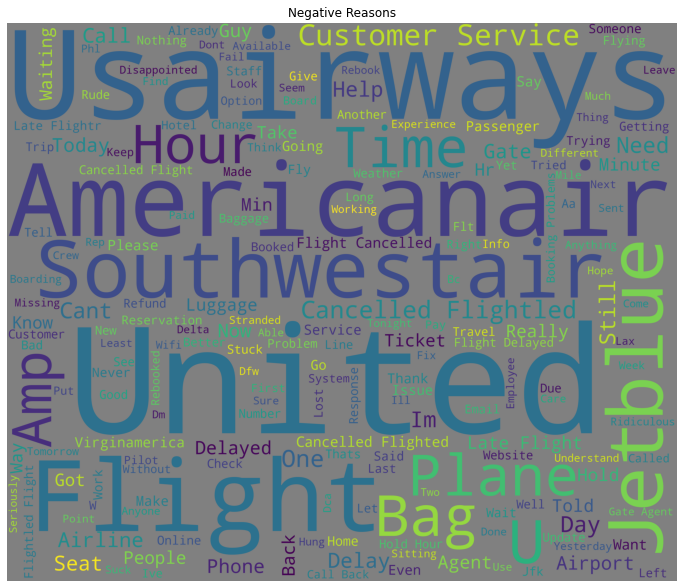

In [77]:
# Text Wordclloud Negative 2, Combining Text column with Negaative Result
new_df=data[data['airline_sentiment']=='negative']
words = ' '.join(new_df['text'])
cleaned_word = " ".join([word for word in words.split()
                            if 'http' not in word
                                and not word.startswith('@')
                                and word != 'RT'
                            ])
wordcloud = WordCloud(stopwords=STOPWORDS,
                      background_color='grey',
                      width=3000,
                      height=2500
                     ).generate(cleaned_word)
plt.figure(1,figsize=(12, 12))
plt.imshow(wordcloud)
plt.axis('off')
plt.title("Negative Reasons")
plt.show()

In [78]:
# Retweet counting mean
data.groupby('airline')['retweet_count'].mean()

airline
American          0.042407
Delta             0.113411
Southwest         0.059917
US Airways        0.085479
United            0.110152
Virgin America    0.051587
Name: retweet_count, dtype: float64

In [79]:
import nltk
import re
import string
import heapq
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
nltk.download('vader_lexicon')
from nltk.sentiment.vader import SentimentIntensityAnalyzer


[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\Durmus\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [80]:
senvad = SentimentIntensityAnalyzer()

In [81]:
data['airline_sentiment'].value_counts()

negative    9178
neutral     3099
positive    2363
Name: airline_sentiment, dtype: int64

In [82]:
# Overall polarity in text column 
senvad.polarity_scores(df.iloc[4]['text'])

{'neg': 0.486, 'neu': 0.514, 'pos': 0.0, 'compound': -0.5829}

In [83]:
df=data[['text']]
df

,text
0,Virginamerica What Dhepburn Said
1,Virginamerica Plus Added Commercials Experienc...
2,Virginamerica I Today Must Mean I Need Take An...
3,Virginamerica Really Aggressive Blast Obnoxiou...
4,Virginamerica Really Big Bad Thing
...,...
14635,Americanair Thank Got Different Flight Chicago
14636,Americanair Leaving 20 Minutes Late Flight No ...
14637,Americanair Please Bring American Airlines Bla...
14638,Americanair Money Change Flight Answer Phones ...


In [84]:
X=data2['text']
y=data2['airline_sentiment']

In [85]:
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')
from nltk.stem import PorterStemmer
import string

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Durmus\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [86]:
stop_words=stopwords.words('english')
punct=string.punctuation
stemmer=PorterStemmer()

In [87]:
import re
cleaned_data=[]
for i in range(len(X)):
   tweet=re.sub('[^a-zA-Z]',' ',X.iloc[i])
   tweet=tweet.lower().split()
   tweet=[stemmer.stem(word) for word in tweet if (word not in stop_words) and (word not in punct)]
   tweet=' '.join(tweet)
   cleaned_data.append(tweet)

In [88]:
data['text'] = cleaned_data
for tweet in cleaned_data[:20]:
    print(tweet)
    s = senvad.polarity_scores(tweet)
    for k in sorted(s):
        print('{0}: {1}, '.format(k, s[k]), end='')
        print()

virginamerica dhepburn said
compound: 0.0, 
neg: 0.0, 
neu: 1.0, 
pos: 0.0, 
virginamerica plu ad commerci experi tacki
compound: 0.0, 
neg: 0.0, 
neu: 1.0, 
pos: 0.0, 
virginamerica today must mean need take anoth trip
compound: 0.0, 
neg: 0.0, 
neu: 1.0, 
pos: 0.0, 
virginamerica realli aggress blast obnoxi entertain guest face amp littl recours
compound: 0.0, 
neg: 0.169, 
neu: 0.662, 
pos: 0.169, 
virginamerica realli big bad thing
compound: -0.5423, 
neg: 0.467, 
neu: 0.533, 
pos: 0.0, 
virginamerica serious would pay flight seat play realli bad thing fli va
compound: -0.4215, 
neg: 0.373, 
neu: 0.482, 
pos: 0.145, 
virginamerica ye nearli everi time fli vx ear worm go away
compound: 0.0, 
neg: 0.0, 
neu: 1.0, 
pos: 0.0, 
virginamerica realli miss prime opportun men without hat parodi http co mwpg grezp
compound: -0.1531, 
neg: 0.118, 
neu: 0.882, 
pos: 0.0, 
virginamerica well
compound: 0.2732, 
neg: 0.0, 
neu: 0.323, 
pos: 0.677, 
virginamerica amaz arriv hour earli good
compoun

In [89]:
# DTM
import nltk
from sklearn.feature_extraction.text import CountVectorizer
from nltk import tokenize
cv = CountVectorizer()

In [90]:
DTM = "virginamerica serious would pay flight seat play realli bad thing fli va"

sentences = tokenize.sent_tokenize(DTM)
sentences

['virginamerica serious would pay flight seat play realli bad thing fli va']

In [91]:
X = cv.fit(sentences)
print(X.vocabulary_)


{'virginamerica': 10, 'serious': 7, 'would': 11, 'pay': 3, 'flight': 2, 'seat': 6, 'play': 4, 'realli': 5, 'bad': 0, 'thing': 8, 'fli': 1, 'va': 9}


In [92]:
X=cv.transform(sentences)
print(X.toarray())


[[1 1 1 1 1 1 1 1 1 1 1 1]]


In [93]:
df=pd.DataFrame(X.toarray(), columns = cv.get_feature_names())
df

,bad,fli,flight,pay,play,realli,seat,serious,thing,va,virginamerica,would
0,1,1,1,1,1,1,1,1,1,1,1,1


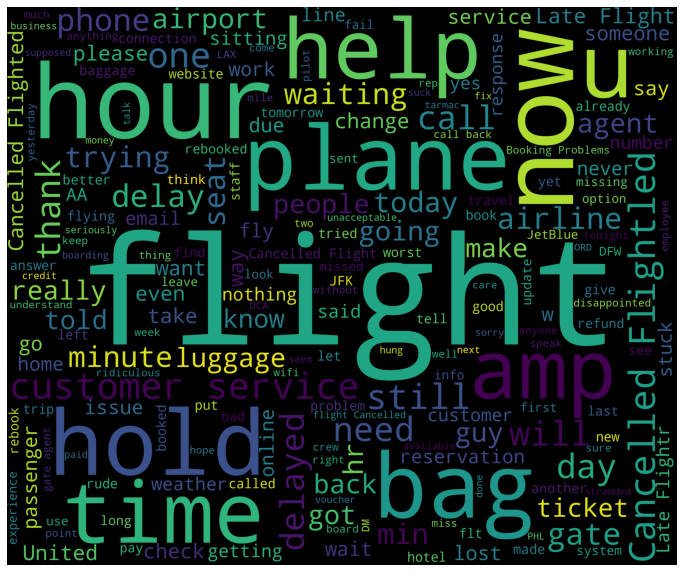

In [94]:
new_df=data2[data2['airline_sentiment']=='negative']
words = ' '.join(new_df['text'])
cleaned_word = " ".join([word for word in words.split()
                            if 'http' not in word
                                and not word.startswith('@')
                                and word != 'RT'
                            ])
wordcloud = WordCloud(stopwords=STOPWORDS,
                      background_color='black',
                      width=3000,
                      height=2500
                     ).generate(cleaned_word)
plt.figure(1,figsize=(12, 12))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

def f(row):
    if data2['airline_sentiment'] == 'neutral':
        val = 'no'
    elif data2['airline_sentiment'] == 'positive':
        val = 'maybe'
    elif data2['airline_sentiment'] == 'negative':
        val = 'negative'
    else:
        val = 'yes'
    return val

#create new column 'Good' using the function above
df['Good'] = df.apply(f, axis=1)

In [95]:
filters = [
   (data2.airline_sentiment == 'neutral'),
   (data2.airline_sentiment == 'negative'),
   (data2.airline_sentiment == 'positive')
]
values = ["0", "1", "2"]

In [96]:
data2["airsentiment"] = np.select(filters, values)
data2.head()

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone,airsentiment
0,570306133677760513,neutral,1.0000,NaN,NaN,Virgin America,NaN,cairdin,NaN,0,@VirginAmerica What @dhepburn said.,NaN,2015-02-24 11:35:52 -0800,NaN,Eastern Time (US & Canada),0
1,570301130888122368,positive,0.3486,NaN,0.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica plus you've added commercials t...,NaN,2015-02-24 11:15:59 -0800,NaN,Pacific Time (US & Canada),2
2,570301083672813571,neutral,0.6837,NaN,NaN,Virgin America,NaN,yvonnalynn,NaN,0,@VirginAmerica I didn't today... Must mean I n...,NaN,2015-02-24 11:15:48 -0800,Lets Play,Central Time (US & Canada),0
3,570301031407624196,negative,1.0000,Bad Flight,0.7033,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica it's really aggressive to blast...,NaN,2015-02-24 11:15:36 -0800,NaN,Pacific Time (US & Canada),1
4,570300817074462722,negative,1.0000,Can't Tell,1.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica and it's a really big bad thing...,NaN,2015-02-24 11:14:45 -0800,NaN,Pacific Time (US & Canada),1


In [99]:
df3=data2[['airsentiment']]
df3

,airsentiment
0,0
1,2
2,0
3,1
4,1
...,...
14635,2
14636,1
14637,0
14638,1


from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

import nltk
from nltk import word_tokenize
from nltk.tokenize import sent_tokenize
from nltk.corpus import PlaintextCorpusReader

import plotly as py
import plotly.graph_objs as go
import matplotlib.pyplot as plt 
import plotly.express as pex
import holoviews as hv
hv.extension('bokeh')

from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

<AxesSubplot:ylabel='airline'>

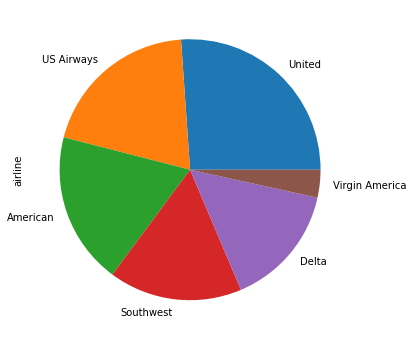

In [100]:
data2.airline.value_counts().plot(kind='pie')

<AxesSubplot:ylabel='airline_sentiment'>

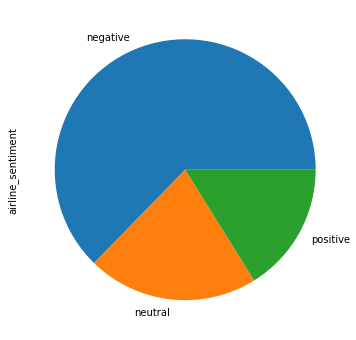

In [111]:
data2.airline_sentiment.value_counts().plot(kind='pie')

In [112]:
test_df = data2[data2.airline == 'Virgin America']
train_df= data2[data2.airline != 'Virgin America']

X_test = test_df.drop(['airline','airsentiment'],axis=1)
X_train = train_df.drop(['airline','airsentiment'],axis=1)
y_test = test_df.airline
y_train = train_df.airline

from yorumsepeti import fetchers  
  
# to get n=100 comments  
fetchers.get_comments(100)